<a href="https://colab.research.google.com/github/gjduart/NN/blob/main/Python_Notebook_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets
from sklearn.model_selection import train_test_split


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = (iris.target != 0).astype(int) # Setosas vs Versicolor & Virginica


# Create test, validation and train sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
     X_train, y_train, test_size=0.20, random_state=1)


# Create a network with 1 linear unit
model = keras.Sequential([
  layers.Dense(units=1, input_shape=[4], activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
  )

print(model.summary())

# Fit the model (and perform validation on it)
history = model.fit(X_train, y_train, 
                  validation_data=(X_val, y_val),
                  epochs=100, 
                  verbose=False)

# Simlar to .score method in Scikit-learn
results = model.evaluate(X_test, y_test)

# Prediction sample-by-sample
print('\n\nChecking the results on test set:')
for x, y in zip(X_test, y_test):
  
  o = model.predict(np.reshape(x, (1, -1)))
  
  o = np.round(o).item()
  
  print('The model output is {} when it should be {}.'.format(o, y))

# Overall results
print('\nChecking the results (a quick resume)')
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 18ms/step - loss: 0.2041 - binary_accuracy: 1.0000


Checking the results on test set:
The model output is 1.0 when it should be 1.
The model output is 0.0 when it should be 0.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 0.0 when it should be 0.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 1.0 when it should be 1.
The model output is 0.0 whe

# Conserte o modelo acima para conseguir uma acurácia de 100% (esse problema é mamão com áçucar. 

# Análise de risco de crédito na Alemanha (pré-Euro).

Quando um banco recebe um pedido de empréstimo, com base no perfil do solicitante, o banco deve tomar uma decisão sobre a aprovação ou não aprovação do empréstimo. Dessa perspectiva, dois tipos de riscos estão associados à decisão do banco:

1. Se o requerente tiver um bom risco de crédito, ou seja, for provável que reembolse o empréstimo, então, não aprovar o empréstimo a esse requerente resulta numa perda de negócios para o banco;
2. Por outro lado, se o requerente for um risco de crédito desfavorável, ou seja, não é provável que reembolse o empréstimo, a aprovação do empréstimo a esse requerente resulta numa perda financeira para o banco.

Para minimizar a perda do ponto de vista do banco, é necessária uma regra de decisão com relação a quem conceder a aprovação do empréstimo e quem não deve. Os perfis demográficos e socioeconômicos do candidato são considerados pelos gerentes de empréstimo antes de tomarem essa decisão. Espera-se que um modelo preditivo treinado com esses dados forneça uma orientação para o gerente de empréstimos no processo de tomada de decisão, tudo com base nos perfis do candidato.
Para ilustrar tal cenário, adotamos uma versão *nova* do conjunto de dados de crédito alemão contendo **apenas** 9 variáveis e os respectivos rótulos de classificação indicando se um candidato é considerado um risco de crédito Bom ou Ruim. 

As informações de cada candidato é descrita da seguinte forma:

```
1. Idade (numérica);
2. Sexo (texto: masculino, feminino);
3. Emprego (numérico: 0 - não qualificado e não residente, 1 - não qualificado e residente, 2 - habilitado, 3 - altamente qualificado);
4. Habitação (texto: próprio, alugado ou gratuito);
5. Contas de poupança (texto - pequeno, moderado, bastante rico, rico);
6. Conta corrente (numérica, em DM - Marco Alemão);
7. Valor do crédito (numérico, em DM);
8. Duração (numérica, no mês);
9. Propósito (texto: carro, móveis / equipamentos, rádio / TV, eletrodomésticos, reparos, educação, negócios, férias / outros).
10. Rótulo (+1 empréstimo aceito, -1 negado).
```

In [ ]:
# Download the Statlog (German Credit Data) Data Set  from UCI Machine Learning
# (Só que do meu Github)
!wget 'https://github.com/sauloafoliveira/huawei-labs/raw/master/german_credit_train.txt' -O german_score_credit_train.csv
!wget 'https://github.com/sauloafoliveira/huawei-labs/raw/master/german_credit_test.txt' -O german_score_credit_test.csv


--2021-03-08 04:10:29--  https://github.com/sauloafoliveira/huawei-labs/raw/master/german_credit_train.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sauloafoliveira/huawei-labs/master/german_credit_train.txt [following]
--2021-03-08 04:10:29--  https://raw.githubusercontent.com/sauloafoliveira/huawei-labs/master/german_credit_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33186 (32K) [text/plain]
Saving to: ‘german_score_credit_train.csv’

german_score_credit 100%[===================>]  32.41K  --.-KB/s    in 0.004s  

2021-03-08 04:10:29 (8.26 MB/s) - ‘german_score_credit_train

Criem uma rede MLP decente (usando o TF) que seja capaz de obter algo em torno de 60-70% de taxa de acurácia. Use o arquivo que termina com ```german_score_credit_train.csv``` para fazer o treinamento e o  ```german_score_credit_test.csv``` para calcularem a taxa de acurácia como visto no exemplo acima.


> Por decente, eu quis dizer um modelo que ao multiplicar o número de camadas ocultas pelo número de neurônios não ultrapassem 50! Esse é o desafio.

> Não esqueçam de todo o framework que vocês viram nas aulas passadas: pré-processamento, normalização, etc.

> Mostrem também o histograma da saída das predições de teste.

In [ ]:
import pandas as pd


german_score_train = pd.read_csv('german_score_credit_train.csv', delimiter="\t" )
german_score_test  = pd.read_csv('german_score_credit_test.csv', delimiter="\t")
#german_score_train = german_score_train.convert_dtypes()
german_score_train['female'] = pd.Categorical(german_score_train['female'])
german_score_train['female'] = german_score_train.female.cat.codes

german_score_train['own'] = pd.Categorical(german_score_train['own'])
german_score_train['own'] = german_score_train.own.cat.codes

german_score_train['little'] = pd.Categorical(german_score_train['little'])
german_score_train['little'] = german_score_train.little.cat.codes

german_score_train['no'] = pd.Categorical(german_score_train['no'])
german_score_train['no'] = german_score_train.no.cat.codes

german_score_train['car'] = pd.Categorical(german_score_train['car'])
german_score_train['car'] = german_score_train.car.cat.codes

german_score_test['female'] = pd.Categorical(german_score_test['female'])
german_score_test['female'] = german_score_test.female.cat.codes

german_score_test['own'] = pd.Categorical(german_score_test['own'])
german_score_test['own'] = german_score_test.own.cat.codes

german_score_test['little'] = pd.Categorical(german_score_test['little'])
german_score_test['little'] = german_score_test.little.cat.codes

german_score_test['moderate'] = pd.Categorical(german_score_test['moderate'])
german_score_test['moderate'] = german_score_test.moderate.cat.codes

german_score_test['business'] = pd.Categorical(german_score_test['business'])
german_score_test['business'] = german_score_test.business.cat.codes


In [ ]:
def normalize(df):
    result = df.copy()
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

In [ ]:
german_score_train  = normalize(german_score_train)
german_score_train

,38,female,0,own,little,no,926,12,car,-1
0,0.071429,1.0,0.000000,0.5,0.50,0.333333,0.787113,0.035714,0.142857,1.0
1,0.125000,1.0,0.666667,0.5,0.25,0.666667,0.058380,0.357143,0.714286,0.0
2,0.125000,1.0,0.333333,0.5,0.00,0.333333,0.018708,0.035714,0.714286,0.0
3,0.071429,1.0,0.666667,0.5,0.00,0.333333,0.848575,0.785714,0.000000,1.0
4,0.178571,1.0,1.000000,1.0,0.25,0.666667,0.090844,0.357143,0.714286,0.0
...,...,...,...,...,...,...,...,...,...,...
694,0.071429,0.0,0.333333,1.0,0.00,0.000000,0.328986,0.571429,0.571429,1.0
695,0.196429,1.0,1.000000,0.5,0.00,0.000000,0.204083,0.571429,0.571429,0.0
696,0.142857,1.0,1.000000,0.5,0.00,0.333333,0.758061,1.000000,0.142857,1.0
697,0.428571,1.0,0.666667,0.5,0.50,0.333333,0.145758,0.250000,0.142857,0.0


In [ ]:
german_score_test  = normalize(german_score_test)
german_score_test

,39,female,2,own,little,moderate,1188,21,business,1
0,0.200000,0.0,1.000000,0.5,0.0,0.333333,0.306547,0.647059,0.571429,1.0
1,0.036364,0.0,0.666667,1.0,0.5,0.666667,0.050715,0.205882,0.714286,0.0
2,0.163636,1.0,0.666667,0.5,0.0,0.333333,0.046978,0.029412,0.714286,0.0
3,0.600000,1.0,0.666667,0.5,0.0,0.666667,0.176440,0.117647,0.714286,0.0
4,0.309091,1.0,0.666667,0.5,0.5,0.333333,0.118701,0.382353,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...
293,0.381818,1.0,1.000000,0.5,0.0,0.000000,0.226704,0.382353,0.142857,0.0
294,0.036364,0.0,0.666667,0.5,0.5,0.666667,0.035249,0.117647,0.714286,0.0
295,0.363636,1.0,0.666667,0.0,0.0,0.000000,0.641706,0.647059,0.142857,1.0
296,0.509091,1.0,0.333333,0.5,0.0,0.666667,0.141706,0.294118,0.142857,1.0


In [ ]:
Y_train = german_score_train.pop('-1')
X_train = german_score_train
X_train.shape

(699, 9)

In [ ]:
n_validation = int(X_train.shape[0]*0.25)

In [ ]:

Y_val = Y_train[:n_validation]
X_val = X_train[:n_validation]

X_train = X_train[n_validation:]
Y_train = Y_train[n_validation:]

In [ ]:
X_train.shape

(525, 9)

In [ ]:

Y_test = german_score_test.pop('1')
X_test = german_score_test

In [ ]:
X_test.shape

(298, 9)

In [ ]:
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout
sgd = optimizers.SGD(lr=1e-3, decay=1e-5, momentum=0.9, nesterov=False)

In [ ]:
model = Sequential()
model.add(Dense(units=20, activation='tanh', input_dim=9, kernel_initializer='glorot_normal', bias_initializer='zeros'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu', bias_initializer='zeros'))


In [ ]:

model.compile(
    optimizer=sgd,
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy'],
  )

print(model.summary())


history = model.fit(X_train.values, Y_train.values, 
                  validation_data=(X_val.values, Y_val.values),
                  epochs=300, batch_size=128,
                  verbose=True)




Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 20)                200       
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 21        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
5/5 [==============================] - 1s 47ms/step - loss: 2.2854 - accuracy: 0.4504 - val_loss: 0.8316 - val_accuracy: 0.5862
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 1.3702 - accuracy: 0.5940 - val_loss: 1.1986 - val_accuracy: 0.6897
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 1.6456 - accuracy: 0.6648 - 

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.414464  ],
       [0.18628152],
       [0.27501032],
       [0.14870289],
       [0.32151884],
       [0.27475244],
       [0.3763953 ],
       [0.31789485],
       [0.37946135],
       [0.42423946],
       [0.3416221 ],
       [0.17363867],
       [0.35388285],
       [0.31140465],
       [0.4037895 ],
       [0.22369118],
       [0.5003775 ],
       [0.3468601 ],
       [0.45701045],
       [0.37265205],
       [0.1969454 ],
       [0.20332865],
       [0.19684379],
       [0.40742743],
       [0.28900906],
       [0.28662556],
       [0.08288765],
       [0.20035724],
       [0.31320226],
       [0.27206075],
       [0.15488175],
       [0.5046218 ],
       [0.4289813 ],
       [0.35010564],
       [0.15623252],
       [0.07995799],
       [0.05798441],
       [0.12735906],
       [0.33296335],
       [0.25681257],
       [0.22184929],
       [0.3408099 ],
       [0.1770569 ],
       [0.18691719],
       [0.33146426],
       [0.2593281 ],
       [0.27584493],
       [0.256

In [ ]:
Y_pred[Y_pred<0.5] = 0 
Y_pred[Y_pred>=0.5] = 1

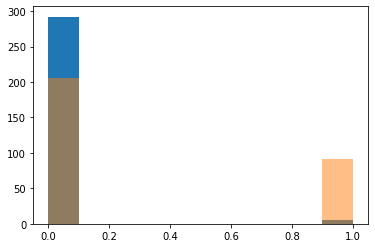

In [ ]:
Y_pred = Y_pred.reshape(-1)
import matplotlib.pyplot as plt

plt.hist(Y_pred,label='Predito')
plt.hist(Y_test,alpha=0.5,label='De Fato')
plt.legend
plt.show()